# **Aircraft Maintenance, Repair & Overhaul Solutions**

**Problem Statement**

Determine if an engine will fail within a specific cycle based on its past cycles and sensory inputs.

Engine problems can affect aircraft extremely quickly.
As a result, maintaining them in excellent shape is essential for the passengers' safety.
The cost of maintaining an aircraft is quite high.
However, we also don't want to take upkeep too seriously.
If a problem is not found in a timely manner, maintaining and repairing the engines may become too costly, or they may need to be replaced.


**Algorithm Used**

Long Short-Term Memory (LSTM) and recurrent neural networks (RNN) for variables that change over time (time-dependent variables).

# **Import Libraries**

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU

In [ ]:
np.random.seed(1234)
PYTHONHASHSEED = 0

# **Import Dataset**

In [ ]:
train_df = pd.read_csv('/content/PM_train.txt', sep=" ", header=None)

In [ ]:
test_df = pd.read_csv('/content/PM_test.txt', sep=" ", header=None)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
train_df.dropna(axis=1, inplace=True)
test_df.dropna(axis=1, inplace=True)

In [ ]:
print(len(train_df))

20631


In [ ]:
print(len(test_df))

13096


In [ ]:
cols_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
train_df.columns = cols_names
test_df.columns = cols_names

In [ ]:
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [ ]:
truth_df = pd.read_csv('/content/PM_truth.txt', sep=" ", header=None)

In [ ]:
truth_df.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [ ]:
truth_df.dropna(axis=1, inplace=True)

In [ ]:
truth_df.head()

,0
0,112
1,98
2,69
3,82
4,91


# **Data Preprocessing**

**1. Generating Classification Target Variable**

The cycles that are on the verge of breaking down will be categorised and assigned an id of 1 in the failure_within_w1 goal variable.

The window_1, which in this instance is 30, is denoted by w1.

**IMP**: In this instance, the aircraft was in poor condition before the most recent cycle, and repair was in fact necessary. Here, estimating the x number of cycles required for the aircraft to break down is crucial. We refer to the number of cycles prior to the breakdown as the window. The window in this instance may be 15, 30, 45, etc. It depends on the accuracy reliance and how early we want to notify the maintenance. Here, we're going to assume that the window is 30 in size. (Aim to find out if the maintenance requiered before 30 cycles)


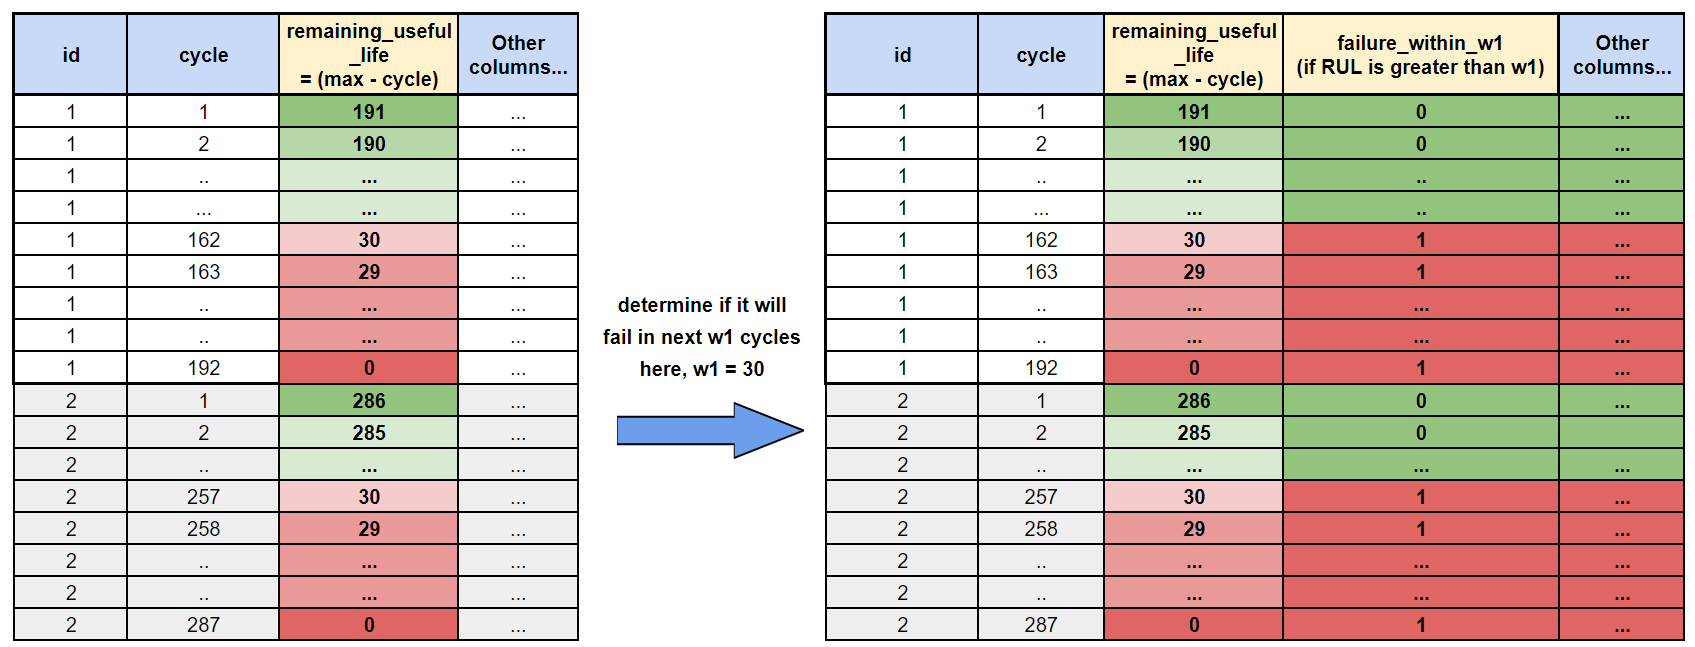

To enable each engine's values to be sorted and saved in a single location, sort the data set according to cycles and id. Utilising sort_values().


In [ ]:
train_df.sort_values(['id','cycle'], inplace=True)
test_df.sort_values(['id','cycle'], inplace=True)

Using groupby(), we first determine the maximum cycles seen for each engine. Then, we use merge() to combine these numbers for the corresponding engine data.

Next, we deduct the current cycle value from the maximum to get the remaining usable life (RUL). For instance, if a cycle has completed 50 of its 192-cycle total life, its residual useful life (RUL) is 192-50 = 142.

In [ ]:
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()

In [ ]:
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')

In [ ]:
train_df['RUL'] = train_df['max'] - train_df['cycle']

In [ ]:
train_df[['id','cycle','max','RUL']].head()

,id,cycle,max,RUL
0,1,1,192,191
1,1,2,192,190
2,1,3,192,189
3,1,4,192,188
4,1,5,192,187


In [ ]:
train_df.drop('max', axis=1, inplace=True)

Generate label column for training data


In [ ]:
w1 = 30
train_df['failure_within_w1'] = np.where(train_df['RUL'] <= w1, 1, 0 )

**2. Normalize Training Dataset**

In [ ]:
train_df['cycle_norm'] = train_df['cycle']

In [ ]:
cols_normalize = train_df.columns.difference(['id','cycle','RUL','failure_within_w1'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]),
                             columns=cols_normalize,
                             index=train_df.index)
join_df = train_df[['id','cycle','RUL','failure_within_w1']].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,failure_within_w1,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0.01108


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]),
                             columns=cols_normalize,
                             index=train_df.index)
join_df = train_df[['id','cycle','RUL','failure_within_w1']].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,failure_within_w1,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0.01108


In [ ]:
join_df = train_df[['id','cycle','RUL','failure_within_w1']].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,failure_within_w1,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0.01108


In [ ]:
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,failure_within_w1,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0.01108


The test data should be normalised in the same way as the training data was.


In [ ]:
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]),
                            columns=cols_normalize,
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['additional_rul']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['additional_rul']
truth_df.drop('additional_rul', axis=1, inplace=True)
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL,failure_within_w1
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735,1.0,142,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916,2.0,141,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166,3.0,140,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737,4.0,139,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130,5.0,138,0


In [ ]:
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]),
                            columns=cols_normalize,
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['additional_rul']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['additional_rul']
truth_df.drop('additional_rul', axis=1, inplace=True)
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [ ]:
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['additional_rul']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['additional_rul']
truth_df.drop('additional_rul', axis=1, inplace=True)
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

As with the training data, label the test set.

In [ ]:
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['additional_rul']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['additional_rul']
truth_df.drop('additional_rul', axis=1, inplace=True)
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

In [ ]:
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['additional_rul']
truth_df.drop('additional_rul', axis=1, inplace=True)
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

In [ ]:
truth_df['max'] = rul['max'] + truth_df['additional_rul']
truth_df.drop('additional_rul', axis=1, inplace=True)
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

In [ ]:
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

In [ ]:
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

# **Exploratory Data Analysis - EDA**

In [ ]:
sensor_cols = cols_names[5:]
train_df[train_df.id==1][sensor_cols].plot(figsize=(20, 8))

In [ ]:
train_df[train_df.id==1][sensor_cols[1]].plot(figsize=(10, 3))

**As the number cycle increases, Sensor 1 readings rise.**

**As the number cycle grows, Sensor 6 readings drop.**

**The majority of other sensors show a trend that is either rising or falling.**

In [ ]:
train_df[train_df.id==5][sensor_cols[1]].plot(figsize=(10, 3))

In [ ]:
train_df[train_df.id==1][sensor_cols[6]].plot(figsize=(10, 3))

**For IDs 1 and 5, we have displayed the sensor1 observations.**

**There is an increasing cyclic pattern in both observations.**


In [ ]:
train_df[train_df.id==50][sensor_cols[6]].plot(figsize=(10, 3))

**For ID 1 and ID 50, we have shown the sensor6 observations.**

**There is a declining tendency with more cycles in both observations.**

**We can infer that the aeroplane may soon stop functioning when the sensor data get close to a certain value.**


# **Generating Input Sequence**

In [ ]:
sequence_length = 50
def sequence_generator(feature_df, seq_length, seq_cols):
    feature_array = feature_df[seq_cols].values
    num_elements = feature_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield feature_array[start:stop, :]
        seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, ["s2"]))
           for id in train_df['id'].unique())
seq_set = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set.shape
def label_generator(label_df, seq_length, label):
    label_array = label_df[label].values
    num_elements = label_array.shape[0]
    return label_array[seq_length:num_elements, :]
    label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1'])
             for id in train_df['id'].unique()]
             label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

In [ ]:
def sequence_generator(feature_df, seq_length, seq_cols):
    feature_array = feature_df[seq_cols].values
    num_elements = feature_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield feature_array[start:stop, :]
        seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, ["s2"]))
           for id in train_df['id'].unique())
seq_set = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set.shape
def label_generator(label_df, seq_length, label):
    label_array = label_df[label].values
    num_elements = label_array.shape[0]
    return label_array[seq_length:num_elements, :]
    label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1'])
             for id in train_df['id'].unique()]
             label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

In [ ]:
seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, ["s2"]))
           for id in train_df['id'].unique())
seq_set = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set.shape
def label_generator(label_df, seq_length, label):
    label_array = label_df[label].values
    num_elements = label_array.shape[0]
    return label_array[seq_length:num_elements, :]
    label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1'])
             for id in train_df['id'].unique()]
             label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

In [ ]:
seq_set = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set.shape
def label_generator(label_df, seq_length, label):
    label_array = label_df[label].values
    num_elements = label_array.shape[0]
    return label_array[seq_length:num_elements, :]
    label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1'])
             for id in train_df['id'].unique()]
             label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

In [ ]:
seq_set.shape
def label_generator(label_df, seq_length, label):
    label_array = label_df[label].values
    num_elements = label_array.shape[0]
    return label_array[seq_length:num_elements, :]
    label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1'])
             for id in train_df['id'].unique()]
             label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

In [ ]:
def label_generator(label_df, seq_length, label):
    label_array = label_df[label].values
    num_elements = label_array.shape[0]
    return label_array[seq_length:num_elements, :]
    label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1'])
             for id in train_df['id'].unique()]
             label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

In [ ]:
label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1'])
             for id in train_df['id'].unique()]
             label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

In [ ]:
label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

In [ ]:
label_set.shape

# **RNN Models**

The following models will be created, trained, and assessed:


*   Simple RNN [1 Feature]
*   Simple RNN [25 Features]
*   Bidirqactional RNN


**1. Simple RNN [1 Feature]**

In [ ]:
out_dim = label_set.shape[1]
features_dim = seq_set.shape[2]
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_fwd = Sequential()
RNN_fwd.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=1,
         return_sequences=False))
RNN_fwd.add(Dropout(0.2))
RNN_fwd.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd.summary())
RNN_fwd_path = '/content/RNN_fwd.h5'

In [ ]:
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_fwd = Sequential()
RNN_fwd.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=1,
         return_sequences=False))
RNN_fwd.add(Dropout(0.2))
RNN_fwd.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd.summary())
RNN_fwd_path = '/content/RNN_fwd.h5'

In [ ]:
RNN_fwd = Sequential()
RNN_fwd.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=1,
         return_sequences=False))
RNN_fwd.add(Dropout(0.2))
RNN_fwd.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd.summary())
RNN_fwd_path = '/content/RNN_fwd.h5'

In [ ]:
RNN_fwd.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd.summary())
RNN_fwd_path = '/content/RNN_fwd.h5'

In [ ]:
print(RNN_fwd.summary())
RNN_fwd_path = '/content/RNN_fwd.h5'

In [ ]:
import time
epochs = 300
batch_size = 200
start = time.time()
RNN_fwd_history = RNN_fwd.fit(seq_set, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Assessment of the Train and Validation Sets Models


In [ ]:
def plot_model_accuracy(model_name_history, width = 10, height = 10):
  fig_acc = plt.figure(figsize=(width, height))
  plt.plot(model_name_history.history['accuracy'])
  plt.plot(model_name_history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
plot_model_accuracy(RNN_fwd_history,10,5)

Training Curve

In [ ]:
def plot_training_curve(model_name_history, width = 10, height = 10):
  fig_acc = plt.figure(figsize=(width, height))
  plt.plot(model_name_history.history['loss'])
  plt.plot(model_name_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
plot_training_curve(RNN_fwd_history,10,5)

Model Evaluation on the Train Set

In [ ]:
def analyze_model_on_train_set(input_sequence_set, model_name):
  model_history_scores = model_name.evaluate(input_sequence_set, label_set, verbose=1, batch_size=50)
  print('\nTrain Accurracy: {}'.format(model_history_scores[1]))
  print('\n')
  y_pred = (model_name.predict(input_sequence_set, verbose=1, batch_size=200) > 0.5).astype("int32")
  y_true = label_set
  test_set = pd.DataFrame(y_pred)
  test_set.to_csv('binary_submit_train.csv', index = None)
  print('\nConfusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
  model_cm = confusion_matrix(y_true, y_pred)
  print(model_cm)
  model_precision = precision_score(y_true, y_pred)
  model_recall = recall_score(y_true, y_pred)
  print( '\nTrain Precision = ', model_precision, '\n', 'Train Recall = ', model_recall)

analyze_model_on_train_set(seq_set, RNN_fwd)

Model evaluation on test set

In [ ]:
def analyze_model_on_test_set(input_sequence_columns, model_path, width= 10, height=5):
  last_test_seq = [test_df[test_df['id']==id][input_sequence_columns].values[-sequence_length:]
                        for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]
  last_test_seq = np.asarray(last_test_seq).astype(np.float32)
  y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]
  last_test_label = test_df.groupby('id')['failure_within_w1'].nth(-1)[y_mask].values
  last_test_label = last_test_label.reshape(last_test_label.shape[0],1).astype(np.float32)
  if os.path.isfile(model_path):
    print("using " + model_path)
    model_estimator = load_model(model_path)
  start = time.time()
  scores_test = model_estimator.evaluate(last_test_seq, last_test_label, verbose=2)
  end = time.time()
  print("Total time taken for inferencing: ", "{:.2f}".format((end-start)), " secs")
  print('\nTest Accurracy: {}'.format(scores_test[1]))
  print('\n')
  y_model_estimator_pred_test = (model_estimator.predict(last_test_seq) >0.5).astype("int32")
  y_true_test = last_test_label
  test_set = pd.DataFrame(y_model_estimator_pred_test)
  test_set.to_csv('binary_submit_test.csv', index = None)
  print('\nConfusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
  model_estimator_conf_m = confusion_matrix(y_true_test, y_model_estimator_pred_test)
  print(model_estimator_conf_m)
  model_estimator_precision_test = precision_score(y_true_test, y_model_estimator_pred_test)
  model_estimator_recall_test = recall_score(y_true_test, y_model_estimator_pred_test)
  f1_test = 2 * (model_estimator_precision_test * model_estimator_recall_test) / (model_estimator_precision_test + model_estimator_recall_test)
  print( '\nTest Precision: ', model_estimator_precision_test, '\n', 'Test Recall: ', model_estimator_recall_test,'\n', 'Test F1-score:', f1_test )
  fig_verify = plt.figure(figsize=(10, 5))
  plt.plot(y_model_estimator_pred_test, color="blue")
  plt.plot(y_true_test, color="green")
  plt.title('prediction')
  plt.ylabel('value')
  plt.xlabel('row')
  plt.legend(['predicted', 'actual data'], loc='upper left')
  plt.show()

analyze_model_on_test_set(["s2"], RNN_fwd_path, 10, 5)

**2. Simple RNN With 25 Features**

In [ ]:
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols_25 = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols_25.extend(sensor_cols)
seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, sequence_cols_25))
           for id in train_df['id'].unique())
seq_set_f25 = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set_f25.shape
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1]
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_fwd_2 = Sequential()
RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, sequence_cols_25))
           for id in train_df['id'].unique())
seq_set_f25 = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set_f25.shape
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1]
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_fwd_2 = Sequential()
RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
seq_set_f25 = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set_f25.shape
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1]
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_fwd_2 = Sequential()
RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
seq_set_f25.shape
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1]
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_fwd_2 = Sequential()
RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1]
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_fwd_2 = Sequential()
RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_fwd_2 = Sequential()
RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_fwd_2 = Sequential()
RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
print(RNN_fwd_2.summary())
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_fwd_2_path = '/content/RNN_fwd_2.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Plot Model Accuracy for the Train and Validation Sets

In [ ]:
plot_model_accuracy(RNN_fwd_2_history, 10, 5)

Training Curve

In [ ]:
plot_training_curve(RNN_fwd_2_history,10,5)

Model Evaluation on Train Set

In [ ]:
analyze_model_on_train_set(seq_set_f25, RNN_fwd_2)

Model Evaluation on Test Set

In [ ]:
analyze_model_on_test_set(sequence_cols_25, RNN_fwd_2_path, 10, 5)

**3. Bidirectional RNN**

In [ ]:
from tensorflow.keras.layers import Bidirectional
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1]
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_bi = Sequential()
RNN_bi.add(Bidirectional(
         SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=6,
         return_sequences=True)))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(Dense(units=out_dim, activation='sigmoid'))
RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1]
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_bi = Sequential()
RNN_bi.add(Bidirectional(
         SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=6,
         return_sequences=True)))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(Dense(units=out_dim, activation='sigmoid'))
RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)
RNN_bi = Sequential()
RNN_bi.add(Bidirectional(
         SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=6,
         return_sequences=True)))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(Dense(units=out_dim, activation='sigmoid'))
RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_bi = Sequential()
RNN_bi.add(Bidirectional(
         SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=6,
         return_sequences=True)))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(Dense(units=out_dim, activation='sigmoid'))
RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_bi.add(Bidirectional(
         SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=6,
         return_sequences=True)))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(Dense(units=out_dim, activation='sigmoid'))
RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_bi.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_bi.add(Dropout(0.2))
RNN_bi.add(Dense(units=out_dim, activation='sigmoid'))
RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_bi.add(Dense(units=out_dim, activation='sigmoid'))
RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_bi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
RNN_bi_path = '/content/RNN_bi.h5'
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
import time
epochs = 200
batch_size = 200
start = time.time()
RNN_bi_history = RNN_bi.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_bi_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
print(RNN_bi.summary())

Plot model accuracy for train and validation set

In [ ]:
plot_model_accuracy(RNN_bi_history,10,5)

Training curve

In [ ]:
plot_training_curve(RNN_bi_history,10,5)

Model Evaluation on train set

In [ ]:
analyze_model_on_train_set(seq_set_f25, RNN_bi)

Model Evaluation on test set

In [ ]:
analyze_model_on_test_set(sequence_cols_25, RNN_bi_path,10,5)

**Overview of RNN**


*   An RNN with more complexity performs better on the test set than one with only one feature.
*   More units in the RNN model with all 25 characteristics result in improved accuracy and other assessment measures.
*  Return_sequences = True must be set in the preceding layer when using several layers.









# **LSTM Model**

In [ ]:
features_dim = seq_set_f25.shape[2]
out_dim = label_set.shape[1]

In [ ]:
print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(
         input_shape=(sequence_length, features_dim),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units=out_dim, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
model_path = '/content/binary_model.h5'

In [ ]:
import time
epochs = 200
batch_size = 200
start = time.time()
history = model.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")

Model Evaluation on Validation set

In [ ]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(seq_set_f25, label_set, verbose=1, batch_size=50)
print('Train Accurracy: {}'.format(scores[1]))
print('\n')
y_pred = (model.predict(seq_set_f25, verbose=1, batch_size=200) > 0.5).astype("int32")
y_true = label_set
test_set = pd.DataFrame(y_pred)
test_set.to_csv('binary_submit_train.csv', index = None)
print('\nConfusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
print(cm)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( '\nTrain Precision = ', precision, '\n', 'Train Recall = ', recall)

Model Evaluation on Test set



In [ ]:
last_test_seq = [test_df[test_df['id']==id][sequence_cols_25].values[-sequence_length:]
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]
last_test_seq = np.asarray(last_test_seq).astype(np.float32)

In [ ]:
y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]
last_test_label = test_df.groupby('id')['failure_within_w1'].nth(-1)[y_mask].values
last_test_label = last_test_label.reshape(last_test_label.shape[0],1).astype(np.float32)

In [ ]:
if os.path.isfile(model_path):
    estimator = load_model(model_path)

In [ ]:
start = time.time()
scores_test = estimator.evaluate(last_test_seq, last_test_label, verbose=2)
end = time.time()
print("Total time taken for inferencing: ", "{:.2f}".format((end-start)), " secs")

In [ ]:
print('Test Accurracy: {}'.format(scores_test[1]))

In [ ]:
y_pred_test = (estimator.predict(last_test_seq) > 0.5).astype("int32")
y_true_test = last_test_label

In [ ]:
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('binary_submit_test.csv', index = None)

In [ ]:
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
conf_m = confusion_matrix(y_true_test, y_pred_test)
print(conf_m)

In [ ]:
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Test Precision: ', precision_test, '\n', 'Test Recall: ', recall_test,'\n', 'Test F1-score:', f1_test )

In [ ]:
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test, color="blue")
plt.plot(y_true_test, color="green")
plt.title('prediction')
plt.ylabel('value')
plt.xlabel('row')
plt.legend(['predicted', 'actual data'], loc='upper left')
plt.show()